In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

D:\Files\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'inertia')

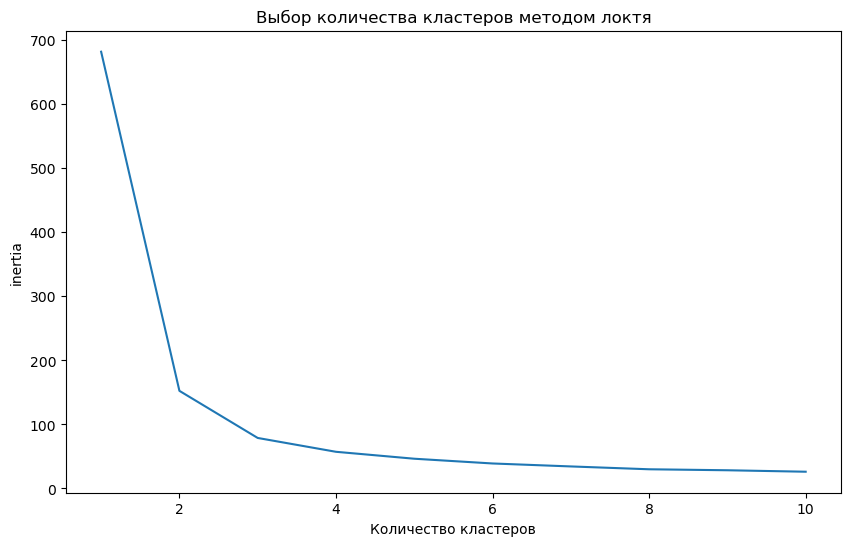

In [16]:
inertia = list()
for i in range(1, 11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertia.append(model.inertia_)
plt.figure(figsize = (10,6))
plt.plot(range(1, 11), inertia)
plt.title('Выбор количества кластеров методом локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('inertia')

In [76]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.2 MB/s eta 0:00:00


In [100]:
from sklearn.metrics import silhouette_score
best_score = 0
best_n_clusters = 2
for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters)
    model.fit(X, y)
    score = silhouette_score(X, model.labels_)
    if score > best_score:
        best_score = score
        best_n_clusters = n_clusters
    print(score)

0.6810461692117462
0.5528190123564095
0.49805050499728737
0.4887488870931056
0.3664804028900833
0.3588294450965686
0.3361777479366204
0.3247749396939602
0.3203826474484704
Лучший результат 0.6810461692117462 с количеством кластеров 2.


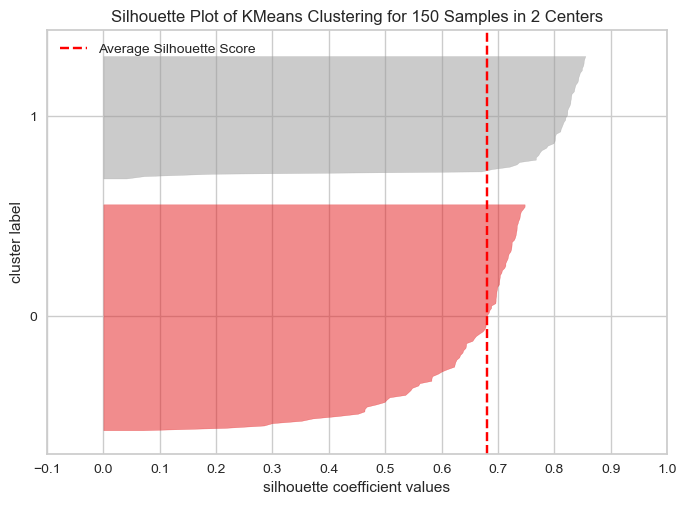

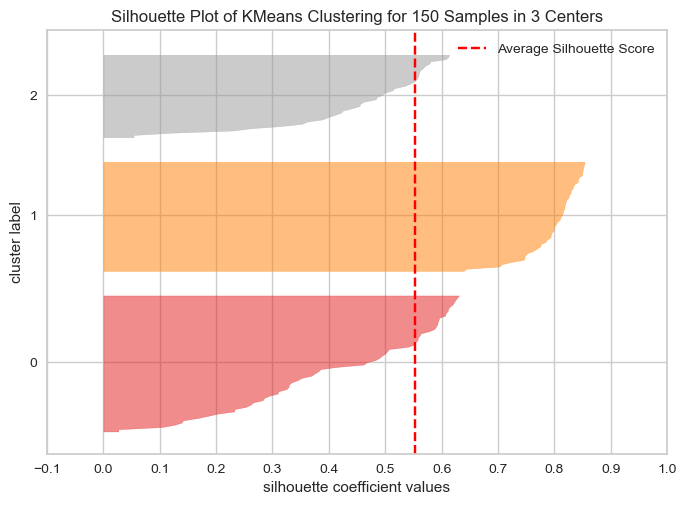

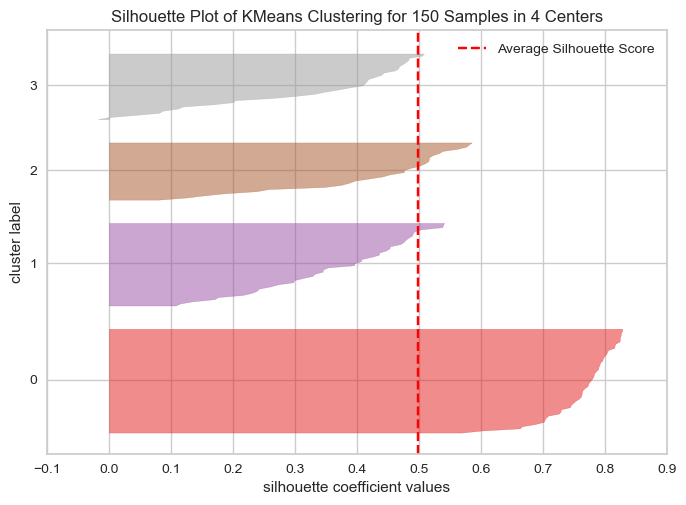

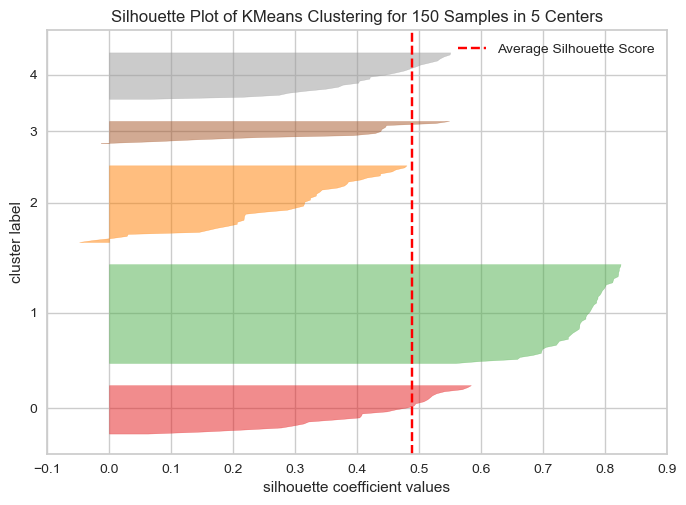

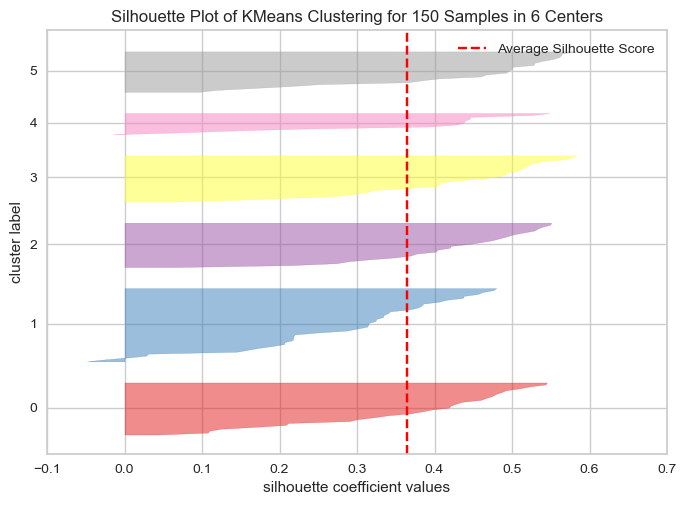

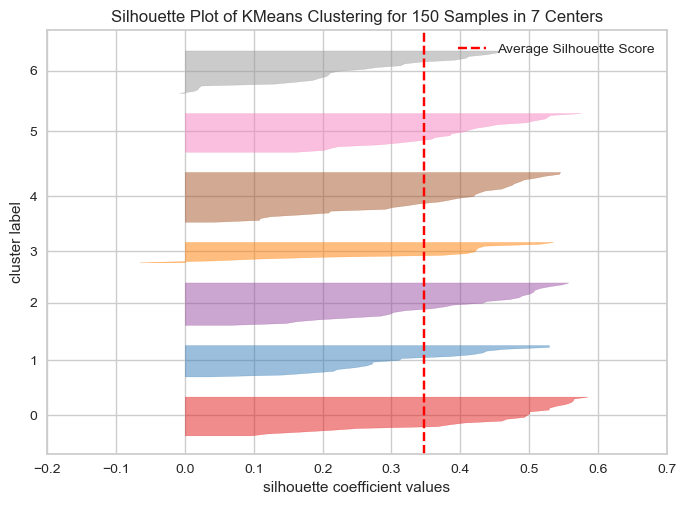

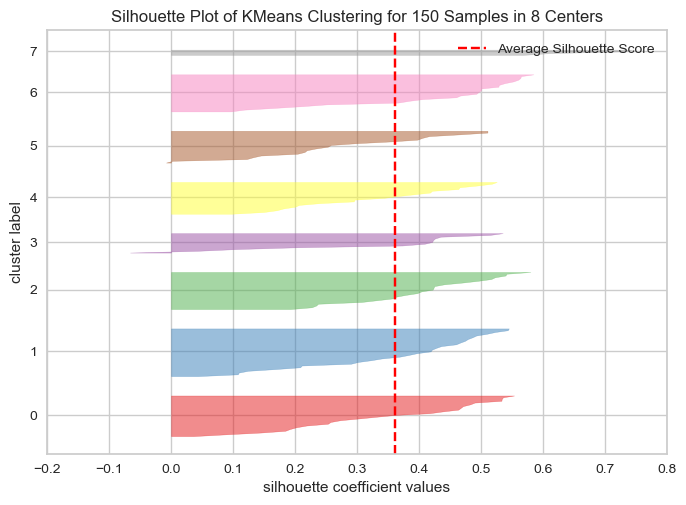

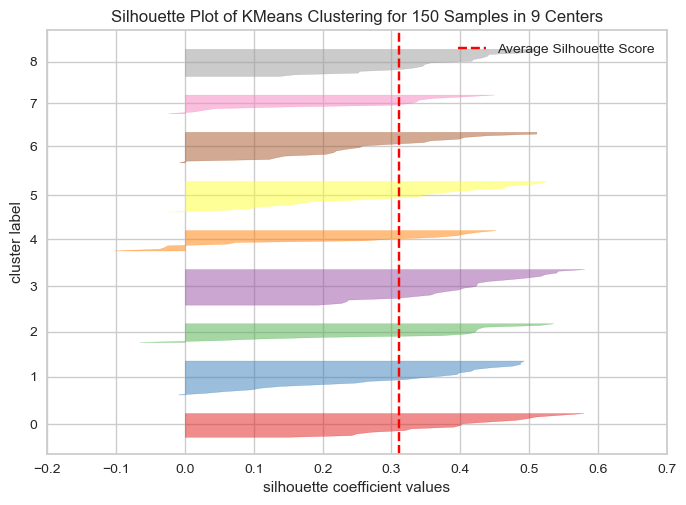

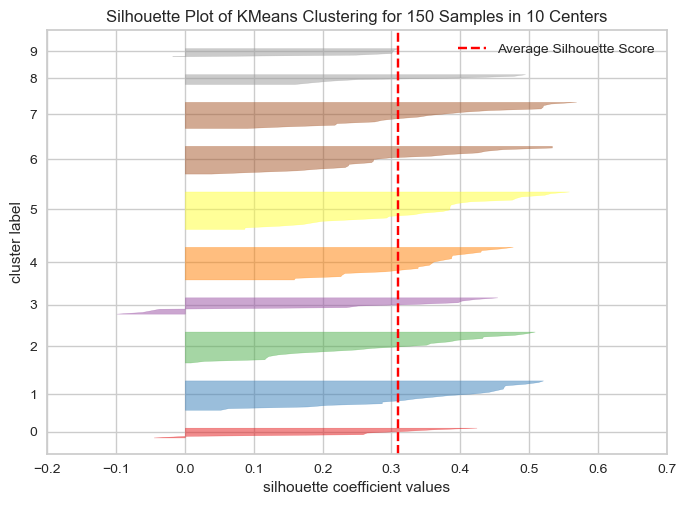

In [101]:
from yellowbrick.cluster import SilhouetteVisualizer
for n_clusters in range(2, 11):
    model = KMeans(n_clusters=n_clusters)
    visualizer = SilhouetteVisualizer(model)
    visualizer.fit(X)
    visualizer.show() 